In [1]:
from plotdelice.graphs import violinplot_delice, barplot_delice
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imaris_ims_file_reader.ims import ims
import os
import seaborn as sns
import random
from tabulate import tabulate
from scipy import stats
import math

In [2]:
path = "/Volumes/G_MLS_RB_UHOME$/qfavey/01_Experiments/F_Spinal Muscle Staining/F01-005/2024-05-16/output-scale-UV-2.csv"
df = pd.read_csv(path)


In [3]:
conds = ["Inpp5e",'WT','Cc2d2a']
genotypes = []
for name in df['Name']:
    for cond in conds:
        if cond in name:
            genotypes.append(cond)
        
df['genotype'] = genotypes


    Cc2d2a mean:                            0.9369576539101186
    Inpp5e mean:                            0.7467385296999952
        WT mean:                            0.8918891043260757
Normality test p-value for the entire dataset (Shapiro): 0.1512816995382309
Data follows normal distribution: Yes
ANOVA: p-val: 9.426755965086308e-05


/Users/quillan/Documents/Gadgets/plotdelice/plotdelice/stats.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = anova_table["PR(>F)"][0]


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Cc2d2a Inpp5e  -0.1902 0.0007 -0.3031 -0.0774   True
Cc2d2a     WT  -0.0451 0.5827 -0.1558  0.0656  False
Inpp5e     WT   0.1452 0.0005  0.0605  0.2298   True
----------------------------------------------------


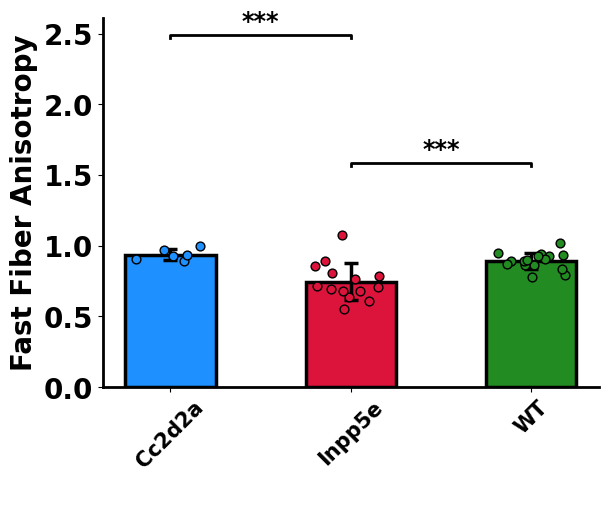

In [4]:
colors=['dodgerblue','crimson','forestgreen']
violin,axs = barplot_delice(df,'genotype','Fa',point_size=40,colors=colors,bar_width=0.50,jitter=0.2,title="",title_size = 50,x_label=" ",y_label=r"Fast Fiber Anisotropy",palette='Set1',bar_edge_color='black', bar_edge_width=2.5, errorbar_width=2.5)
#violin.savefig("F01-004-MPS-per-Somite.pdf", bbox_inches='tight')

    Cc2d2a mean:                            0.9369576539101186
    Inpp5e mean:                             0.746738529699995
        WT mean:                            0.8918891043260757
Normality test p-value for the entire dataset (Shapiro): 0.1512816995382309
Data follows normal distribution: Yes
ANOVA: p-val: 9.426755965086157e-05


/Users/quillan/Documents/Gadgets/plotdelice/plotdelice/stats.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = anova_table["PR(>F)"][0]


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Cc2d2a Inpp5e  -0.1902 0.0007 -0.3031 -0.0774   True
Cc2d2a     WT  -0.0451 0.5827 -0.1558  0.0656  False
Inpp5e     WT   0.1452 0.0005  0.0605  0.2298   True
----------------------------------------------------


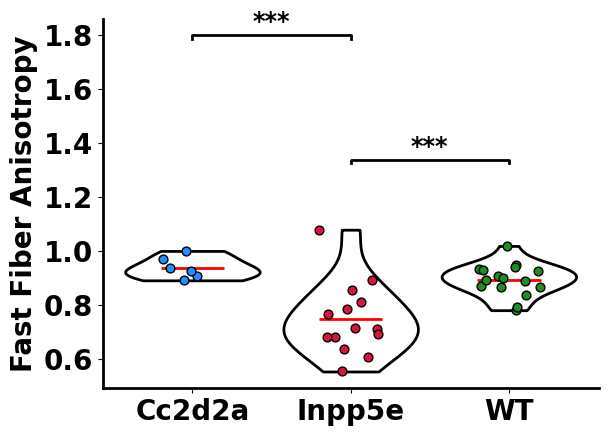

In [5]:
colors=['dodgerblue','crimson','forestgreen']
violin,axs = violinplot_delice(df,'genotype','Fa',point_size=40,colors=colors,jitter=0.2,title="",title_size = 50,y_label=r"Fast Fiber Anisotropy",)
#violin.savefig("F01-004-MPS-per-Somite.pdf", bbox_inches='tight')

In [6]:
def strarray_to_array(array_str):
    
    # Convert string to array
    array = np.fromstring(array_str[1:-1], sep=' ')

    return array

In [7]:
def strarray_to_array(array_str):
    # Convert string to array
    array = np.fromstring(array_str[1:-1], sep=' ')
    return array

# convert the str_arrays to arrays
df['angles'] = df['angles'].apply(strarray_to_array)




In [8]:
mean_angles = {}
sd_angles = {}
for cond in conds:
    mean_angles[cond] = np.mean(df['angles'][df['genotype'] == cond])
    sd_angles[cond] = np.std([df['angles'][df['genotype'] == cond]])
print(sd_angles)


{'Inpp5e': array([0.01132744, 0.01180249, 0.01164256, 0.01326441, 0.01512439,
       0.01911277, 0.02503125, 0.03452943, 0.04584107, 0.06047602,
       0.07218007, 0.08440201, 0.09761824, 0.10596915, 0.11605702,
       0.1178057 , 0.11740874, 0.12294519, 0.12382183, 0.13078608,
       0.13565591, 0.13316399, 0.12565728, 0.11612874, 0.10435864,
       0.09779618, 0.10450058, 0.1168301 , 0.13021126, 0.13745945,
       0.13474817, 0.13126466, 0.12600188, 0.11655191, 0.10227685,
       0.08959346, 0.0805521 , 0.06930983, 0.0594714 , 0.0511623 ,
       0.04407588, 0.03778355, 0.03225804, 0.02722657, 0.02449932,
       0.02109394, 0.01819426, 0.01544762, 0.01483929, 0.01399027,
       0.01134836, 0.01178539, 0.01145729, 0.0118818 , 0.01402164,
       0.01601286, 0.02018345, 0.02543723, 0.03296752, 0.04156962,
       0.05147199, 0.07121924, 0.08614494, 0.10254057, 0.1140759 ,
       0.12380056, 0.12641352, 0.12738531, 0.12927877, 0.13302222,
       0.13915203, 0.14322309, 0.14439642, 0.136284

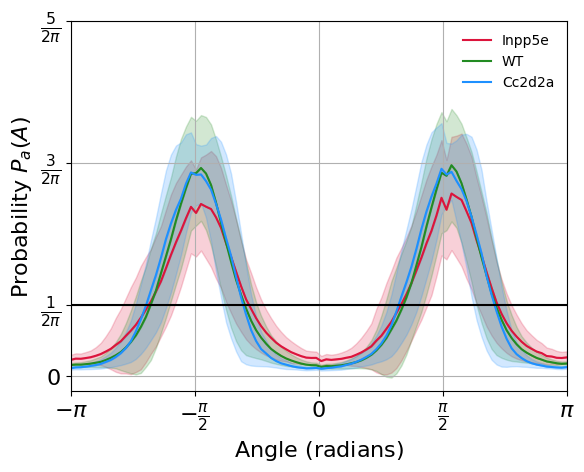

In [12]:
# Plot the PDF as a line plot
plt.figure()
#color_map = sns.color_palette("Set1", n_colors=len(conds))
color_map = colors
color_dic = {cond: color for cond, color in zip(np.sort(conds), color_map)}
for cond in conds:
    x=np.linspace(-np.pi,np.pi,len(mean_angles[cond]))
    plt.plot(x, mean_angles[cond], linestyle='-', marker='',label=cond,color=color_dic[cond])
    plt.fill_between(x,mean_angles[cond],mean_angles[cond]+sd_angles[cond],color=color_dic[cond],alpha=0.2)
    plt.fill_between(x,mean_angles[cond],mean_angles[cond]-sd_angles[cond],color=color_dic[cond],alpha=0.2)

# Set x-axis limits to -π to π
plt.xlim(-np.pi, np.pi)

# add 1/(2pi) vlin
plt.hlines(1/np.pi/2,-np.pi,np.pi,color = 'black')

# Set x-axis ticks to π values with bigger font size
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
        [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'], fontsize=16)

# Set y-axis ticks to π values with bigger font size
plt.yticks([ 0, 1/np.pi/2, 3/2/np.pi,5/2/np.pi], 
        [ r'$0$', r'$\frac{1 }{2\pi}$', r'$\frac{3}{2\pi}$',r'$\frac{5}{2\pi}$'], fontsize=16)

# Set title with bigger font size
# plt.title(f'Probability Density Function of WTMM Angles \n', fontsize=18, loc="center" )
#plt.text(0.1,0.71,f'Scale $a={5}px$')
plt.xlabel(r'$\text{Angle (radians)}$', fontsize=16)
plt.ylabel(r'Probability $P_{a}(A)$', fontsize=16)
plt.grid(True)
plt.legend(loc='upper right',frameon=False)
plt.show()

    Cc2d2a mean:                            0.9369576539101186
    Inpp5e mean:                             0.746738529699995
        WT mean:                            0.8918891043260757
Normality test p-value for the entire dataset (Shapiro): 0.1512816995382309
Data follows normal distribution: Yes
ANOVA: p-val: 9.426755965086157e-05


/Users/quillan/Documents/Gadgets/plotdelice/plotdelice/stats.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = anova_table["PR(>F)"][0]


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Cc2d2a Inpp5e  -0.1902 0.0007 -0.3031 -0.0774   True
Cc2d2a     WT  -0.0451 0.5827 -0.1558  0.0656  False
Inpp5e     WT   0.1452 0.0005  0.0605  0.2298   True
----------------------------------------------------


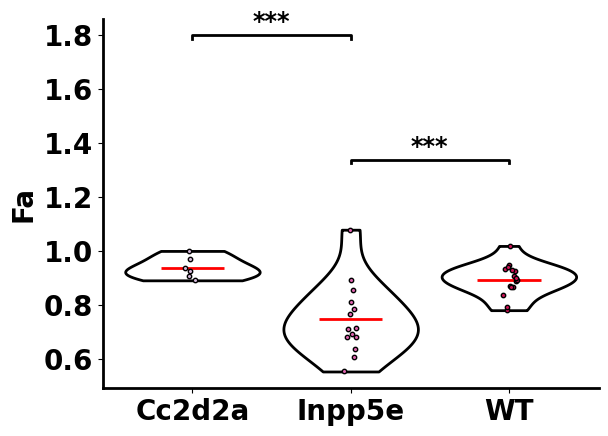

(<Figure size 640x480 with 1 Axes>, <Axes: ylabel='Fa'>)

In [13]:
violinplot_delice(df,'genotype','Fa')